# **Eurorepo.**
Información acerca de la documentación de incidentes de ciberseguridad en los que se comprometen infraestructuras críticas. Incluye detalles sobre ataques, como el tipo de ataque (secuestro de cuentas, robo de datos), las fechas de inicio y fin, las víctimas (empresas, individuos), y enlaces a fuentes que reportan el incidente.

## Importación de librerias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Importación e información del dataframe.


In [2]:
df = pd.read_csv("../data/EUROREPO.csv", index_col=0)
df.head()

,name,description,start_date,end_date,inclusion_criteria,inclusion_criteria_subcode,source_incident_detection_disclosure,incident_type,receiver_name,receiver_country,...,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,casualties,sources_url,added_to_DB,updated_at
ID,,,,,,,,,,,,,,,,,,,,,
3723,Unknown hackers compromised the domain and X a...,Unknown hackers compromised the domain and X a...,2024-08-20,2024-08-21,Attack on critical infrastructure target(s),NaN,Incident disclosed by victim,Hijacking without Misuse,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),...,NaN,NaN,NaN,Not available,NaN,NaN,NaN,https://hackread.com/fur-affinity-website-hack...,2024-08-23,2024-08-25
3721,Unknown attackers infected the online stores o...,Malwarebyte Labs reports unknown attackers inf...,2024-08-01,2024-08-22,Attack on critical infrastructure target(s),NaN,Incident disclosed by IT-security company,Data theft; Hijacking with Misuse,Not available - Not available - Not available,Not available; Canada; Europe (region),...,NaN,NaN,NaN,Not available,NaN,NaN,NaN,https://www.malwarebytes.com/blog/cybercrime/2...,2024-08-23,2024-08-23
3720,Unknown Hackers Breached McDonald’s Instagram ...,"On 21 August 2024, unknown hackers gained cont...",2024-08-21,2024-08-21,Attack on critical infrastructure target(s),NaN,Incident disclosed by attacker,Hijacking with Misuse,McDonald’s,United States,...,NaN,NaN,NaN,Not available,NaN,NaN,NaN,https://www.finansgundem.com/haber/hackerlar-m...,2024-08-23,2024-08-23
3719,Akira Ransomware Group Steals and Encrypts Dat...,"On 29 July 2024, Swiss industrial company Hoer...",2024-07-29,2024-08-21,Attack on critical infrastructure target(s),NaN,Incident disclosed by attacker,Data theft; Disruption; Hijacking with Misuse;...,Hoerbiger Holding,Switzerland,...,NaN,NaN,NaN,Not available,NaN,NaN,NaN,https://www.inside-it.ch/schweizer-industrieko...,2024-08-23,2024-08-23
3717,Unknown hackers target New Caledonian Internet...,Unknown hackers target New Caledonian Internet...,2024-08-18,Not available,Attack on critical infrastructure target(s),NaN,Incident disclosed by victim,Disruption; Ransomware,Lagoon,New Caledonia,...,NaN,NaN,NaN,Not available,NaN,NaN,NaN,https://www.zataz.com/cyberattaque-en-caledoni...,2024-08-22,2024-08-22


In [3]:
df.shape

(1215, 82)

In [4]:
df.dtypes

name                         object
description                  object
start_date                   object
end_date                     object
inclusion_criteria           object
                             ...   
legal_response_indicator     object
casualties                  float64
sources_url                  object
added_to_DB                  object
updated_at                   object
Length: 82, dtype: object

In [5]:
df.columns

Index(['name', 'description', 'start_date', 'end_date', 'inclusion_criteria',
       'inclusion_criteria_subcode', 'source_incident_detection_disclosure',
       'incident_type', 'receiver_name', 'receiver_country', 'receiver_region',
       'receiver_category', 'receiver_category_subcode', 'initiator_name',
       'initiator_country', 'initiator_category', 'initiator_category_subcode',
       'number_of_attributions', 'attribution_ID', 'attribution_date',
       'attribution_type', 'attribution_basis', 'attributing_actor',
       'attribution_it_company', 'attributing_country', 'attributed_initiator',
       'attributed_initiator_country', 'attributed_initiator_category',
       'sources_attribution', 'cyber_conflict_issue', 'offline_conflict_issue',
       'offline_conflict_issue_subcode', 'offline_conflict_intensity',
       'offline_conflict_intensity_subcode', 'number_of_political_responses',
       'political_response_date', 'political_response_type',
       'political_response_t

Este es un desglose de lo que trata cada columna del DataFrame.

1. **Name**: Nombre del incidente o evento relacionado.
2. **Description**: Descripción detallada del incidente o evento.
3. **Start date**: Fecha de inicio del incidente o conflicto.
4. **End date**: Fecha de finalización del incidente o conflicto (si aplica).
5. **Inclusion criteria**: Criterios utilizados para incluir el incidente en la base de datos.
6. **Inclusion criteria subcode**: Subcódigo que especifica los criterios de inclusión.
7. **Source incident detection disclosure**: Fuente de detección o divulgación del incidente.
8. **Incident type**: Tipo de incidente o ataque.
9. **Receiver name**: Nombre de la entidad que recibe o sufre el ataque.
10. **Receiver country**: País de la entidad que recibe el ataque.
11. **Receiver region**: Región geográfica del receptor del ataque.
12. **Receiver category**: Categoría de la entidad receptora del ataque.
13. **Receiver category subcode**: Subcódigo de la categoría de la entidad receptora.
14. **Initiator name**: Nombre de la entidad que inicia o perpetra el ataque.
15. **Initiator country**: País de la entidad iniciadora del ataque.
16. **Initiator category**: Categoría de la entidad iniciadora del ataque.
17. **Initiator category subcode**: Subcódigo de la categoría de la entidad iniciadora.
18. **Number of attributions**: Número de atribuciones o asignaciones del ataque a un actor.
19. **Attribution ID**: ID de la atribución del incidente.
20. **Attribution date**: Fecha en que se realizó la atribución del ataque.
21. **Attribution type**: Tipo de atribución realizada (e.g., política, técnica).
22. **Attribution basis**: Base sobre la cual se realizó la atribución (evidencia, análisis).
23. **Attributing actor**: Actor o entidad que hizo la atribución del incidente.
24. **Attribution it company**: Compañía tecnológica involucrada en la atribución del ataque.
25. **Attributing country**: País del actor que hizo la atribución del incidente.
26. **Attributed initiator**: Entidad a la que se le atribuye la autoría del ataque.
27. **Attributed initiator country**: País del iniciador atribuido.
28. **Attributed initiator category**: Categoría del iniciador atribuido.
29. **Sources attribution**: Fuentes que respaldan la atribución del ataque.
30. **Cyber conflict issue**: Temas o problemas relacionados con el conflicto cibernético.
31. **Offline conflict issue**: Temas o problemas del conflicto fuera del ciberespacio.
32. **Offline conflict issue subcode**: Subcódigo que detalla el problema de conflicto offline.
33. **Offline conflict intensity**: Intensidad del conflicto fuera del ciberespacio.
34. **Offline conflict intensity subcode**: Subcódigo para la intensidad del conflicto offline.
35. **Number of political responses**: Número de respuestas políticas al incidente.
36. **Political response date**: Fecha de la respuesta política.
37. **Political response type**: Tipo de respuesta política.
38. **Political response type subcode**: Subcódigo de la respuesta política.
39. **Political response country**: País que realizó la respuesta política.
40. **Political response actor**: Actor o entidad que realizó la respuesta política.
41. **Zero days**: Indicador de si se usó una vulnerabilidad "zero-day" (día cero) en el ataque.
42. **Zero days subcode**: Subcódigo relacionado con vulnerabilidades de día cero.
43. **MITRE initial access**: Técnica inicial de acceso según la clasificación MITRE ATT&CK.
44. **MITRE impact**: Impacto según la clasificación MITRE ATT&CK.
45. **User interaction**: Indicador de si hubo interacción con usuarios (p.ej., phishing).
46. **Has disruption**: Si el incidente provocó alguna interrupción o no.
47. **Data theft**: Indicador de si hubo robo de datos.
48. **disruption**: Detalle sobre la interrupción causada por el incidente.
49. **Hijacking**: Indicador de si hubo secuestro de sistemas o servicios.
50. **Physical effects spatial**: Efectos físicos a nivel espacial debido al incidente.
51. **Physical effects temporal**: Efectos físicos a nivel temporal causados por el incidente.
52. **Unweighted cyber intensity**: Intensidad cibernética sin ponderar.
53. **Target multiplier**: Multiplicador de objetivos afectados por el incidente.
54. **Weighted cyber intensity**: Intensidad cibernética ponderada.
55. **Impact indicator**: Indicador general del impacto del incidente.
56. **Impact indicator value**: Valor del indicador de impacto.
57. **Functional impact**: Impacto funcional causado por el incidente.
58. **Intelligence impact**: Impacto sobre la inteligencia o recolección de datos.
59. **Political impact affected entities**: Entidades afectadas por el impacto político.
60. **Political impact affected entities exact value**: Valor exacto de las entidades afectadas políticamente.
61. **Political impact third countries**: Terceros países afectados por el incidente.
62. **Political impact third countries exact value**: Valor exacto de terceros países afectados políticamente.
63. **Economic impact**: Impacto económico del incidente.
64. **Economic impact exact value**: Valor exacto del impacto económico.
65. **Economic impact currency**: Moneda utilizada para medir el impacto económico.
66. **State responsibility indicator**: Indicador de responsabilidad estatal en el incidente.
67. **IL breach indicator**: Indicador de si hubo una violación del derecho internacional.
68. **IL breach indicator subcode**: Subcódigo relacionado con la violación del derecho internacional.
69. **Evidence for sanctions indicator**: Indicador de evidencia que justifique sanciones.
70. **Number of legal responses**: Número de respuestas legales al incidente.
71. **Legal response date**: Fecha de las respuestas legales.
72. **Legal response type**: Tipo de respuesta legal.
73. **Legal response type subcode**: Subcódigo del tipo de respuesta legal.
74. **Legal response country**: País que realizó la respuesta legal.
75. **Legal response actor**: Actor o entidad que realizó la respuesta legal.
76. **Legal attribution reference**: Referencia a la atribución legal del ataque.
77. **Legal attribution reference subcode**: Subcódigo de la referencia de atribución legal.
78. **Legal Response Indicator**: Indicador de la existencia de una respuesta legal.
79. **Casualities**: Número de bajas o víctimas relacionadas con el incidente.
80. **Sources URL**: URLs o fuentes que documentan el incidente.
81. **Added to DB**: Fecha en que el incidente fue añadido a la base de datos.
82. **Updated at**: Fecha de la última actualización del registro en la base de datos.

Debemos de conocer bien esta diferencia para proseguir:
En este contexto, los términos **receiver**, **attribution**, y **attributed** se refieren a diferentes roles o aspectos dentro del ciclo de un incidente o ataque cibernético. Aquí está la explicación de cada uno:

1. **Receiver (Receptor)**:
- El **receiver** o receptor es la **entidad objetivo** del ataque. Este puede ser un país, una organización, una institución o un individuo que está en el lado que **recibe** el ataque o la amenaza cibernética.

2. **Attribution (Atribución)**:
- El término **attribution** hace referencia a la **identificación del autor o actor** que está detrás del ataque. En ciberseguridad, la atribución es el proceso de determinar quién o qué está detrás de una actividad maliciosa.

3. **Attributed (Atribuido)**:
- **Attributed** se refiere a la entidad que ha sido **acusada o identificada como responsable** del ataque. Es el actor, país, grupo o persona a quien se le asigna la responsabilidad del incidente.

**Resumen:**
- **Receiver** es quien **recibe** el ataque.
- **Attribution** es el **proceso de identificar** quién está detrás del ataque.
- **Attributed** se refiere a la **entidad acusada o identificada** como responsable del ataque.

In [6]:
df.describe()

,number_of_attributions,number_of_political_responses,unweighted_cyber_intensity,weighted_cyber_intensity,impact_indicator_value,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value,economic_impact_exact_value,number_of_legal_responses,casualties
count,1215.000000,1215.000000,1215.000000,1112.000000,1023.000000,1023.000000,1023.000000,1.023000e+03,1215.000000,0.0
mean,1.179424,0.103704,2.597531,2.877698,4.525904,13.799609,0.558162,1.811799e+06,0.133333,NaN
std,0.614813,0.497881,1.541890,1.497483,3.596729,286.681874,1.210800,2.878795e+07,0.400165,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,NaN
50%,1.000000,0.000000,3.000000,3.000000,6.000000,1.000000,0.000000,0.000000e+00,0.000000,NaN
75%,1.000000,0.000000,4.000000,4.000000,7.000000,1.000000,1.000000,0.000000e+00,0.000000,NaN
max,10.000000,7.000000,7.000000,11.000000,14.000000,8000.000000,23.000000,8.720000e+08,3.000000,NaN


In [7]:
df.describe(include='object')

,name,description,start_date,end_date,inclusion_criteria,inclusion_criteria_subcode,source_incident_detection_disclosure,incident_type,receiver_name,receiver_country,...,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,sources_url,added_to_DB,updated_at
count,1215,1215,1179,1215,1214,256,1193,1212,1032,1214,...,673,14,664,665,919,6,667,1206,1215,1215
unique,1213,1213,564,388,32,7,25,35,725,432,...,13,8,44,78,11,5,4,1194,379,280
top,Chafer vs. Kuwait,Two Chinese hackers working with the Ministry ...,2023-01-01,Not available,Attack on critical infrastructure target(s),Attack conducted by a state-affiliated group (...,Incident disclosed by victim,Data theft; Hijacking with Misuse,Not available,United States,...,Not available,Travel bans,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,https://www.dragos.com/year-in-review/#section...,2022-08-15,2022-11-02
freq,2,3,43,731,549,116,346,319,89,241,...,526,3,518,563,886,2,476,4,310,92


Al ser tantas columnas, deberemos de hacer un análisis por grupos de columnas.

### **Inclusion** e **Incident**.

In [9]:
df_1 = df.filter(regex='^inclusion|incident', axis=1)
df_1

,inclusion_criteria,inclusion_criteria_subcode,source_incident_detection_disclosure,incident_type
ID,,,,
3723,Attack on critical infrastructure target(s),NaN,Incident disclosed by victim,Hijacking without Misuse
3721,Attack on critical infrastructure target(s),NaN,Incident disclosed by IT-security company,Data theft; Hijacking with Misuse
3720,Attack on critical infrastructure target(s),NaN,Incident disclosed by attacker,Hijacking with Misuse
3719,Attack on critical infrastructure target(s),NaN,Incident disclosed by attacker,Data theft; Disruption; Hijacking with Misuse;...
3717,Attack on critical infrastructure target(s),NaN,Incident disclosed by victim,Disruption; Ransomware
...,...,...,...,...
959,Attack conducted by nation state (generic “sta...,NaN,Incident disclosed by IT-security company,Data theft; Hijacking with Misuse
960,Attack conducted by non-state group / non-stat...,Attack conducted by a state-affiliated group (...,Incident disclosed by IT-security company,Data theft; Hijacking with Misuse
966,Attack conducted by non-state group / non-stat...,Attack conducted by a state-affiliated group (...,Incident disclosed by IT-security company,Data theft; Hijacking with Misuse


In [10]:
df_1.isnull().sum()

inclusion_criteria                        1
inclusion_criteria_subcode              959
source_incident_detection_disclosure     22
incident_type                             3
dtype: int64

**Inclusion Criteria** es una columna que se deberia eliminar ya que es una columna que describe los criterios para incluir el suceso en el Database. No aporta información relevante y además no contiene relación con ningún CSV. A su vez, **Inclusion Criteria Subcode** será eliminada porque la mayoria de sus valores son nulos. **Source incident detection disclosure** se ha eliminado ya que es una columna que pone la compañia que ha detectado el incidente. No aporta información para el objetivo principal.


In [11]:
df.drop(['inclusion_criteria', 'inclusion_criteria_subcode', 'source_incident_detection_disclosure'], axis=1, inplace=True)

In [12]:
df.dropna(subset=['incident_type'], inplace=True) #pocas filas con nulos.

### **Receiver.**

In [13]:
df_1 = df.filter(regex='receiver', axis=1)
df_1

,receiver_name,receiver_country,receiver_region,receiver_category,receiver_category_subcode
ID,,,,,
3723,"Sean ""Dragoneer"" Piche (Founder of Fur Affinit...",United States; Global (region),NATO; NORTHAM -,End user(s) / specially protected groups - Cri...,- Digital Provider
3721,Not available - Not available - Not available,Not available; Canada; Europe (region),- NATO; NORTHAM -,Unknown - Education - Critical infrastructure,- - Food
3720,McDonald’s,United States,NATO; NORTHAM,Critical infrastructure,Food
3719,Hoerbiger Holding,Switzerland,EUROPE; WESTEU,Critical infrastructure,Critical Manufacturing
3717,Lagoon,New Caledonia,NaN,Critical infrastructure,Telecommunications
...,...,...,...,...,...
959,None - None - None,"Russia; Egypt; Iran, Islamic Republic of",EUROPE; EASTEU; CSTO; SCO - MENA; MEA; AFRICA;...,Critical infrastructure; Critical infrastructu...,Energy; Chemicals; Defence industry; - Energy...
960,None - None - None - None - None - None - None...,United States; Brazil; China; France; Germany;...,NATO; NORTHAM - SOUTHAM - ASIA; SCS; EASIA; NE...,State institutions / political system; Critica...,; Energy; Transportation; Health; Finance; - ...
966,None - None - None,Vietnam; Japan; Middle East (region),ASIA; SCS; SEA - ASIA; SCS; NEA -,State institutions / political system; Critica...,Government / ministries; Transportation; ; ; H...


In [14]:
df_1.isnull().sum()

receiver_name                183
receiver_country               1
receiver_region               69
receiver_category              0
receiver_category_subcode     10
dtype: int64

Optamos por eliminar la **región** ya que va a dividirse por continentes.

-------
**MIRAR QUE HACER CON LAS CATEGORY**



In [15]:
df.drop(['receiver_region'], axis=1, inplace=True)

In [16]:
df.dropna(subset=['receiver_country'], inplace=True) #pocas filas con nulos.

### **Initiator.**

In [17]:
df_1 = df.filter(regex='^initiator', axis=1)
df_1

,initiator_name,initiator_country,initiator_category,initiator_category_subcode
ID,,,,
3723,Not available,Not available,Not available,NaN
3721,Not available,Not available,Not available,NaN
3720,Not available,Not available,Not available,NaN
3719,Akira Ransomware Group/Storm-1567,Not available,Non-state-group,Criminal(s)
3717,Not available,Not available,Not available,NaN
...,...,...,...,...
959,NSA/Equation Group,Unknown,Unknown - not attributed,NaN
960,APT 20,China,"Non-state actor, state-affiliation suggested",NaN
966,APT37/Richochet Chollima/Red Eyes/InkySquid/Sc...,"Korea, Democratic People's Republic of; Korea,...","Non-state actor, state-affiliation suggested; ...",NaN


In [18]:
df_1.isnull().sum()

initiator_name                109
initiator_country               1
initiator_category              1
initiator_category_subcode    750
dtype: int64

------------------------


**QUE HACER CON LOS NULOS DE INDICATOR NAME**

In [19]:
df.drop(['initiator_category_subcode'], axis=1, inplace=True)

In [20]:
df.dropna(subset=['initiator_country', 'initiator_category'], inplace=True) #pocas filas con nulos.

### **Attribution** y **Attributing**.

In [21]:
df_1 = df.filter(regex='^attribut|number_of_attributions', axis=1)
df_1

,number_of_attributions,attribution_ID,attribution_date,attribution_type,attribution_basis,attributing_actor,attribution_it_company,attributing_country,attributed_initiator,attributed_initiator_country,attributed_initiator_category
ID,,,,,,,,,,,
3723,1,20800,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available
3721,1,20814,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available
3720,1,20790,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available
3719,1,20787,2024-08-21 00:00:00,"Direct statement in media report (e.g., Reuter...",Attacker confirms,Akira Ransomware Group,Not available,Not available,Akira Ransomware Group/Storm-1567,Not available,Non-state-group
3717,1,20753,NaT,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available
...,...,...,...,...,...,...,...,...,...,...,...
959,2,1128; 1129,2018-01-01 00:00:00; 2018-01-01 00:00:00,"Technical report (e.g., by IT-companies, Citiz...",IT-security community attributes attacker; Med...,NaN,NaN,NaN,NSA/Equation Group; NSA/Equation Group,Unknown; United States,Unknown - not attributed; State
960,1,1130,2019-01-01 00:00:00,"Technical report (e.g., by IT-companies, Citiz...",IT-security community attributes attacker,NaN,NaN,NaN,APT 20,China,"Non-state actor, state-affiliation suggested"
966,1,6582; 6582,2018-01-01 00:00:00; 2018-01-01 00:00:00,"Technical report (e.g., by IT-companies, Citiz...",IT-security community attributes attacker; IT-...,NaN,NaN,NaN,APT37/Richochet Chollima/Red Eyes/InkySquid/Sc...,"Korea, Democratic People's Republic of; Korea,...","Non-state actor, state-affiliation suggested; ..."


In [22]:
df_1.isnull().sum()

number_of_attributions             0
attribution_ID                     0
attribution_date                   0
attribution_type                   0
attribution_basis                  0
attributing_actor                254
attribution_it_company           289
attributing_country              252
attributed_initiator             102
attributed_initiator_country       0
attributed_initiator_category      0
dtype: int64

Quito attribution_it_company porque entre los valores nulos y los Not_avaliable quedan 227 valores útiles

In [23]:
df.drop(['attribution_it_company'], axis=1, inplace=True)

In [24]:
df.dropna(subset=['number_of_attributions', 'attribution_ID', 'attribution_date', 'attribution_type', 'attribution_basis'], inplace=True) #pocas filas con nulos.

NI IDEA DE QUE HACER AQUI ---- 

### **Attributed**.

In [25]:
df_1 = df.filter(regex='attributed|sources_attribution', axis=1)
df_1

,attributed_initiator,attributed_initiator_country,attributed_initiator_category,sources_attribution
ID,,,,
3723,Not available,Not available,Not available,NaN
3721,Not available,Not available,Not available,NaN
3720,Not available,Not available,Not available,NaN
3719,Akira Ransomware Group/Storm-1567,Not available,Non-state-group,https://www.security-incidents.de/assets/img/i...
3717,Not available,Not available,Not available,NaN
...,...,...,...,...
959,NSA/Equation Group; NSA/Equation Group,Unknown; United States,Unknown - not attributed; State,https://www.zdnet.com/article/kaspersky-says-i...
960,APT 20,China,"Non-state actor, state-affiliation suggested",NaN
966,APT37/Richochet Chollima/Red Eyes/InkySquid/Sc...,"Korea, Democratic People's Republic of; Korea,...","Non-state actor, state-affiliation suggested; ...",https://www2.fireeye.com/rs/848-DID-242/images...


In [26]:
df_1.isnull().sum()

attributed_initiator             102
attributed_initiator_country       0
attributed_initiator_category      0
sources_attribution              516
dtype: int64

Uso todas, porque hay dos que no tienen valores nulos, y sources_attribution considero que es importante. Attribute_iniciator la dejo porque probablemente ayude ne la precisión.

In [27]:
df.dropna(subset=['attributed_initiator', 'attributed_initiator_country', 'attributed_initiator_category', 'sources_attribution'], inplace=True)

### Conflict.

In [28]:
df_1 = df.filter(regex='conflict', axis=1)
df_1

,cyber_conflict_issue,offline_conflict_issue,offline_conflict_issue_subcode,offline_conflict_intensity,offline_conflict_intensity_subcode
ID,,,,,
3719,NaN,NaN,NaN,NaN,NaN
3703,System / ideology; Territory; Resources; Inter...,System/ideology; Territory; Resources; Interna...,Russia – Ukraine; Russia – Ukraine; Russia – U...,Yes / HIIK intensity,HIIK 5
3704,Unknown,Unknown,NaN,Unknown,NaN
3708,International power,Unknown,NaN,Unknown,NaN
3701,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
957,International power,Unknown,NaN,Unknown,NaN
959,Unknown,Unknown,NaN,Unknown,NaN
966,International power,Unknown,NaN,Unknown,NaN


In [29]:
df_1.isnull().sum()

cyber_conflict_issue                    2
offline_conflict_issue                  2
offline_conflict_issue_subcode        467
offline_conflict_intensity              2
offline_conflict_intensity_subcode    442
dtype: int64

En este caso, no eliminaremos **offline conflict intensity subcode** ya que si se mira el csv a cada nulo de estos se le atribuye valores tales como: Unknown o Not avaliable. 

- MIRAR SI ELIMINAR AMBAS FILAS O HACER X NIVELES DE IMPORTANCIA, ya qu een subcode vienen cosas como HIIK 3 o 4 o 5 entonces mirar x orden de improtancia y a los unknown poner con un 0 a lo mejor (no se si esto es lo mas adecuado).

In [30]:
def transform_subcode(value):
    if pd.isna(value) or value in ["Unknown", "Not available"]:
        return 0
    else:
        
        try:
            return int(value.split()[-1])
        except ValueError:
            return 0

df['offline_conflict_intensity_subcode_transformed'] = df['offline_conflict_intensity_subcode'].apply(transform_subcode)

print(df[['offline_conflict_intensity_subcode', 'offline_conflict_intensity_subcode_transformed']].head())

     offline_conflict_intensity_subcode  \
ID                                        
3719                                NaN   
3703                             HIIK 5   
3704                                NaN   
3708                                NaN   
3701                                NaN   

      offline_conflict_intensity_subcode_transformed  
ID                                                    
3719                                               0  
3703                                               5  
3704                                               0  
3708                                               0  
3701                                               0  


### **Political Response**.

In [31]:
df_1 = df.filter(regex='political_response', axis=1)
df_1

,number_of_political_responses,political_response_date,political_response_type,political_response_type_subcode,political_response_country,political_response_actor
ID,,,,,,
3719,0,NaN,NaN,NaN,NaN,NaN
3703,0,NaN,Not available,NaN,Not available,Not available
3704,0,NaN,Not available,NaN,Not available,Not available
3708,0,NaN,Not available,NaN,Not available,Not available
3701,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
957,0,NaN,NaN,NaN,NaN,NaN
959,0,NaN,NaN,NaN,NaN,NaN
966,0,NaN,NaN,NaN,NaN,NaN


In [32]:
df_1.isnull().sum()

number_of_political_responses        0
political_response_date            579
political_response_type            161
political_response_type_subcode    582
political_response_country         161
political_response_actor           161
dtype: int64

In [33]:
df[df['number_of_political_responses'] == 0].shape[0] #total de filas con valor 0

579

In [34]:
df.drop(list(df_1.columns), axis=1, inplace=True)

In [35]:
df.shape

(646, 71)

### **Zero** y **MITRE**.

In [36]:
df_1 = df.filter(regex='zero|MITRE', axis=1)
df_1

,zero_days,zero_days_subcode,MITRE_initial_access,MITRE_impact
ID,,,,
3719,NaN,NaN,NaN,NaN
3703,NaN,NaN,NaN,NaN
3704,NaN,NaN,NaN,NaN
3708,NaN,NaN,NaN,NaN
3701,NaN,NaN,NaN,NaN
...,...,...,...,...
957,No,NaN,NaN,NaN
959,No,NaN,NaN,NaN
966,Yes,One,NaN,NaN


In [37]:
df_1.isnull().sum()

zero_days                50
zero_days_subcode       621
MITRE_initial_access    215
MITRE_impact            215
dtype: int64

In [38]:
df.drop(['zero_days_subcode'], axis=1, inplace=True)

### **User interaction**, **Disruption**, **Data theft**, **Hijacking**.

In [39]:
df_1 = df.filter(regex='user|disruption|data|hijacking', axis=1)
df_1

,user_interaction,has_disruption,data_theft,disruption,hijacking
ID,,,,,
3719,NaN,False,NaN,NaN,NaN
3703,NaN,False,NaN,NaN,NaN
3704,NaN,False,NaN,NaN,NaN
3708,NaN,False,NaN,NaN,NaN
3701,NaN,False,NaN,NaN,NaN
...,...,...,...,...,...
957,NaN,False,For private / commercial targets: non-sensitiv...,none,none
959,NaN,False,For private / commercial targets: non-sensitiv...,none,"Hijacking, system misuse, e.g., through data t..."
966,NaN,False,For private / commercial targets: non-sensitiv...,none,"Hijacking, system misuse, e.g., through data t..."


In [40]:
df_1.describe()

,user_interaction,has_disruption,data_theft,disruption,hijacking
count,379,646,585,598,589
unique,2,2,4,4,4
top,Not available,False,For private / commercial targets: non-sensitiv...,Not available,"Hijacking, system misuse, e.g., through data t..."
freq,374,418,230,236,391


Eliminaremos **User interaction** debido a que en su mayoria salvo aproximadamante 10, son valores: `Not available`. Por tanto, esta columna no aportará información al estudio.

In [41]:
df.drop(['user_interaction'], axis=1, inplace=True)

### **Physical**, **Un-Weighted** y **Target Multiplier**.

In [42]:
df_1 = df.filter(regex='physical|weigh|target', axis=1)
df_1

,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity
ID,,,,,
3719,NaN,NaN,0,NaN,NaN
3703,NaN,NaN,0,NaN,NaN
3704,NaN,NaN,0,NaN,NaN
3708,NaN,NaN,0,NaN,NaN
3701,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...
957,none,none,1,Moderate - high political importance,1.0
959,none,none,3,Moderate - high political importance,3.0
966,none,none,3,Moderate - high political importance,3.0


In [43]:
df_1.describe(include='all')

,physical_effects_spatial,physical_effects_temporal,unweighted_cyber_intensity,target_multiplier,weighted_cyber_intensity
count,593,593,646.000000,594,597.000000
unique,4,4,NaN,3,NaN
top,none,none,NaN,Moderate - high political importance,NaN
freq,578,579,NaN,570,NaN
mean,NaN,NaN,2.577399,NaN,2.852596
std,NaN,NaN,1.547005,NaN,1.561399
min,NaN,NaN,0.000000,NaN,0.000000
25%,NaN,NaN,1.000000,NaN,1.000000
50%,NaN,NaN,3.000000,NaN,3.000000
75%,NaN,NaN,4.000000,NaN,4.000000


In [44]:
df_1.isnull().sum()

physical_effects_spatial      53
physical_effects_temporal     53
unweighted_cyber_intensity     0
target_multiplier             52
weighted_cyber_intensity      49
dtype: int64

HACER 0,1,2 CODIFICACION ORDINAL PARA TODAS SALVO LAS Q SEAN INT. Y RELLENAR CON LA MEDIANA Y MODA DIRIA

In [45]:
columns_to_transform = ['physical_effects_spatial', 'physical_effects_temporal', 'unweighted_cyber_intensity', 'target_multiplier', 'weighted_cyber_intensity']

def ordinal_encoding(value):
    if pd.isna(value) or value in ["Unknown", "Not available"]:
        return 0
    else:
        return 1

for col in columns_to_transform:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(ordinal_encoding)

for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

df.head()


,name,description,start_date,end_date,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,...,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator,casualties,sources_url,added_to_DB,updated_at,offline_conflict_intensity_subcode_transformed
ID,,,,,,,,,,,,,,,,,,,,,
3719,Akira Ransomware Group Steals and Encrypts Dat...,"On 29 July 2024, Swiss industrial company Hoer...",2024-07-29,2024-08-21,Data theft; Disruption; Hijacking with Misuse;...,Hoerbiger Holding,Switzerland,Critical infrastructure,Critical Manufacturing,Akira Ransomware Group/Storm-1567,...,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,NaN,https://www.inside-it.ch/schweizer-industrieko...,2024-08-23,2024-08-23,0
3703,Ukrainian cyber hacktivists from the „BO team“...,Ukrainian cyber hacktivists from the „BO team“...,2024-08-01,Not available,Data theft & Doxing; Disruption; Hijacking wit...,Vega (Internet Provider),Russia,Critical infrastructure,Telecommunications,BO Team,...,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,NaN,https://www.ukrinform.net/rubric-society/38961...,2024-08-19,2024-08-19,5
3704,"Agent Tesla threat actor ""Fucosreal"" used the ...","According to a report by CheckPoint Research, ...",2024-03-01,Not available,Data theft; Hijacking with Misuse,Not available - Not available - Not available ...,China; Philippines; United Arab Emirates; India,Critical infrastructure; Corporate Targets (co...,Transportation; ; Chemicals - Transportation; ...,Fucosreal<Agent Tesla,...,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,NaN,https://research.checkpoint.com/2024/unmasking...,2024-08-19,2024-08-19,0
3708,Chinese state-affiliated APT Earth Baku target...,"Earth Baku, a hacking group associated with th...",2022-01-01,Not available,Data theft; Hijacking with Misuse,Not available - Not available - Not available ...,Qatar; Italy; Germany; United Arab Emirates; T...,State institutions / political system; Critica...,Government / ministries; Health; ; Telecommuni...,Earth Baku < APT41/BARIUM/Wicked Panda/G0096 (...,...,Not available,Not available,Cyber espionage,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,NaN,https://securityaffairs.com/167207/breaking-ne...,2024-08-19,2024-08-19,0
3701,3AM Ransomware Group Accessed and Exfiltrated ...,"On 22 February 2024, Idaho-based healthcare pr...",2024-02-22,2024-03-24,Data theft & Doxing; Disruption; Hijacking wit...,Kootenai Health,United States,Critical infrastructure,Health,3AM Ransomware,...,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...,NaN,https://securityaffairs.com/167020/data-breach...,2024-08-16,2024-08-16,0


### **Impact**.

In [46]:
df_1 = df.filter(regex='^impact|functional|intelligence', axis=1)
df_1

,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact
ID,,,,
3719,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...
3703,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...
3704,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...
3708,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...
3701,Not available,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...
...,...,...,...,...
957,Low,5.0,No system interference/disruption,No data breach/exfiltration or data corruption...
959,Low,5.0,No system interference/disruption,No data breach/exfiltration or data corruption...
966,Low,0.0,No system interference/disruption,No data breach/exfiltration or data corruption...


In [47]:
df_1.describe(include='all')

,impact_indicator,impact_indicator_value,functional_impact,intelligence_impact
count,646,646.000000,646,646
unique,4,NaN,6,6
top,Low,NaN,No system interference/disruption,No data breach/exfiltration or data corruption...
freq,400,NaN,455,454
mean,NaN,4.586687,NaN,NaN
std,NaN,3.262815,NaN,NaN
min,NaN,0.000000,NaN,NaN
25%,NaN,0.000000,NaN,NaN
50%,NaN,5.000000,NaN,NaN
75%,NaN,7.000000,NaN,NaN


In [48]:
df_1.isnull().sum()

impact_indicator          0
impact_indicator_value    0
functional_impact         0
intelligence_impact       0
dtype: int64

### **Political Impact**.

In [49]:
df_1 = df.filter(regex='political_impact', axis=1)
df_1

,political_impact_affected_entities,political_impact_affected_entities_exact_value,political_impact_third_countries,political_impact_third_countries_exact_value
ID,,,,
3719,1-10,0.0,1-10,0.0
3703,1-10,0.0,1-10,0.0
3704,1-10,0.0,1-10,0.0
3708,1-10,0.0,1-10,0.0
3701,1-10,0.0,1-10,0.0
...,...,...,...,...
957,1-10,0.0,1-10,0.0
959,1-10,0.0,1-10,0.0
966,1-10,0.0,1-10,0.0


In [50]:
df_1.isnull().sum()

political_impact_affected_entities                0
political_impact_affected_entities_exact_value    0
political_impact_third_countries                  0
political_impact_third_countries_exact_value      0
dtype: int64

En este caso eliminaremos las columnas que no contengan el valor exacto debido a que tienen mayor número de filas nulas y las otras son mas precisas. Las filas con valores exactos con valores nulas lo reemplazaremos por la **mediana**.

In [51]:
df.drop(['political_impact_affected_entities', 'political_impact_third_countries'], axis=1, inplace=True)

In [52]:
columns_to_fill = ['political_impact_affected_entities_exact_value', 'political_impact_third_countries_exact_value']

for col in columns_to_fill:
    df[col].fillna(df[col].median(), inplace=True)

df[columns_to_fill].head()

,political_impact_affected_entities_exact_value,political_impact_third_countries_exact_value
ID,,
3719,0.0,0.0
3703,0.0,0.0
3704,0.0,0.0
3708,0.0,0.0
3701,0.0,0.0


### **Economic**, **State Responsability**, **IL**, **Evidence**.

In [53]:
df_1 = df.filter(regex='economic|IL|evidence|state', axis=1)
df_1

,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator
ID,,,,,,,
3719,Not available,0.0,euro,None/Negligent,Due diligence; Sovereignty,Civic / political rights; ;,Not available
3703,Not available,0.0,euro,None/Negligent,Due diligence; Sovereignty,Civic / political rights; ;,Not available
3704,Not available,0.0,euro,None/Negligent,Due diligence; Sovereignty,Civic / political rights; ;,Not available
3708,Not available,0.0,euro,None/Negligent,Due diligence; Sovereignty,Civic / political rights; ;,Not available
3701,Not available,0.0,euro,None/Negligent,Due diligence; Sovereignty,Civic / political rights; ;,Not available
...,...,...,...,...,...,...,...
957,Not available,0.0,euro,None/Negligent,Due diligence; Sovereignty,Civic / political rights; ;,Not available
959,Not available,0.0,euro,None/Negligent,Due diligence; Sovereignty,Civic / political rights; ;,Not available
966,Not available,0.0,euro,None/Negligent,Due diligence; Sovereignty,Civic / political rights; ;,Not available


In [54]:
df_1.isnull().sum()

economic_impact                     0
economic_impact_exact_value         0
economic_impact_currency            0
state_responsibility_indicator      0
IL_breach_indicator                 0
IL_breach_indicator_subcode         0
evidence_for_sanctions_indicator    0
dtype: int64

In [55]:
df_1.describe(include='all')

,economic_impact,economic_impact_exact_value,economic_impact_currency,state_responsibility_indicator,IL_breach_indicator,IL_breach_indicator_subcode,evidence_for_sanctions_indicator
count,646,6.460000e+02,646,646,646,646,646
unique,2,NaN,2,4,55,47,2
top,Not available,NaN,euro,None/Negligent,Due diligence; Sovereignty,Civic / political rights; ;,Not available
freq,640,NaN,638,486,346,488,645
mean,NaN,4.603715e+05,NaN,NaN,NaN,NaN,NaN
std,NaN,5.388881e+06,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN
75%,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN


Eliminaremos la columna **Economic Impact** debido a que la mayoria de sus filas son nulas. A su vez tambiés será eliminada **Economic Impact Currenc**y ya que proporciona la moneda utilizada y eso no aporta información.

In [56]:
df.drop(['economic_impact','economic_impact_currency'], axis=1, inplace=True)

### **Legal**.

In [57]:
df_1 = df.filter(regex='legal', axis=1)
df_1

,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator
ID,,,,,,,,,
3719,0,2023-10-30 00:00:00,Not available,Travel bans,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
3703,0,2023-10-30 00:00:00,Not available,Travel bans,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
3704,0,2023-10-30 00:00:00,Not available,Travel bans,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
3708,0,2023-10-30 00:00:00,Not available,Travel bans,Not available,Not available,Cyber espionage,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
3701,0,2023-10-30 00:00:00,Not available,Travel bans,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
...,...,...,...,...,...,...,...,...,...
957,0,2023-10-30 00:00:00,Not available,Travel bans,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
959,0,2023-10-30 00:00:00,Not available,Travel bans,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
966,0,2023-10-30 00:00:00,Not available,Travel bans,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...


In [58]:
df_1.isnull().sum()

number_of_legal_responses              0
legal_response_date                    0
legal_response_type                    0
legal_response_type_subcode            0
legal_response_country                 0
legal_response_actor                   0
legal_attribution_reference            0
legal_attribution_reference_subcode    0
legal_response_indicator               0
dtype: int64

In [59]:
df_1.describe(include='all')

,number_of_legal_responses,legal_response_date,legal_response_type,legal_response_type_subcode,legal_response_country,legal_response_actor,legal_attribution_reference,legal_attribution_reference_subcode,legal_response_indicator
count,646.000000,646,646,646,646,646,646,646,646
unique,NaN,63,13,8,32,45,11,5,4
top,NaN,2023-10-30 00:00:00,Not available,Travel bans,Not available,Not available,Not available,Civic / political rights,Unfriendly acts/retorsions justified (missing ...
freq,NaN,575,567,637,568,589,617,642,494
mean,0.137771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.421769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df.drop(['legal_response_date','legal_response_type_subcode', 'legal_attribution_reference_subcode'], axis=1, inplace=True)

### Resto de columnas.

In [61]:
df_1 = df.iloc[:, -4:]
df_1

,sources_url,added_to_DB,updated_at,offline_conflict_intensity_subcode_transformed
ID,,,,
3719,https://www.inside-it.ch/schweizer-industrieko...,2024-08-23,2024-08-23,0
3703,https://www.ukrinform.net/rubric-society/38961...,2024-08-19,2024-08-19,5
3704,https://research.checkpoint.com/2024/unmasking...,2024-08-19,2024-08-19,0
3708,https://securityaffairs.com/167207/breaking-ne...,2024-08-19,2024-08-19,0
3701,https://securityaffairs.com/167020/data-breach...,2024-08-16,2024-08-16,0
...,...,...,...,...
957,https://www.zdnet.com/article/north-korean-apt...,2022-08-15,2022-11-02,0
959,https://securelist.com/darkpulsar/88199/https:...,2022-08-15,2022-11-02,0
966,https://www2.fireeye.com/rs/848-DID-242/images...,2022-08-15,2023-02-08,0


In [62]:
df_1.isnull().sum()

sources_url                                       0
added_to_DB                                       0
updated_at                                        0
offline_conflict_intensity_subcode_transformed    0
dtype: int64

In [63]:
df.dropna(subset=['sources_url'], inplace=True) #pocas filas con nulos.

Eliminamos estas ya que una de ellas tiene todo valores nulos. En el caso de las otras, son fechas que no interesan y no proporcionan información relevante.

In [64]:
df.drop(['added_to_DB','casualties', 'updated_at'], axis=1, inplace=True)

In [65]:
df.head()

,name,description,start_date,end_date,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,...,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_country,legal_response_actor,legal_attribution_reference,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed
ID,,,,,,,,,,,,,,,,,,,,,
3719,Akira Ransomware Group Steals and Encrypts Dat...,"On 29 July 2024, Swiss industrial company Hoer...",2024-07-29,2024-08-21,Data theft; Disruption; Hijacking with Misuse;...,Hoerbiger Holding,Switzerland,Critical infrastructure,Critical Manufacturing,Akira Ransomware Group/Storm-1567,...,Civic / political rights; ;,Not available,0,Not available,Not available,Not available,Not available,Unfriendly acts/retorsions justified (missing ...,https://www.inside-it.ch/schweizer-industrieko...,0
3703,Ukrainian cyber hacktivists from the „BO team“...,Ukrainian cyber hacktivists from the „BO team“...,2024-08-01,Not available,Data theft & Doxing; Disruption; Hijacking wit...,Vega (Internet Provider),Russia,Critical infrastructure,Telecommunications,BO Team,...,Civic / political rights; ;,Not available,0,Not available,Not available,Not available,Not available,Unfriendly acts/retorsions justified (missing ...,https://www.ukrinform.net/rubric-society/38961...,5
3704,"Agent Tesla threat actor ""Fucosreal"" used the ...","According to a report by CheckPoint Research, ...",2024-03-01,Not available,Data theft; Hijacking with Misuse,Not available - Not available - Not available ...,China; Philippines; United Arab Emirates; India,Critical infrastructure; Corporate Targets (co...,Transportation; ; Chemicals - Transportation; ...,Fucosreal<Agent Tesla,...,Civic / political rights; ;,Not available,0,Not available,Not available,Not available,Not available,Unfriendly acts/retorsions justified (missing ...,https://research.checkpoint.com/2024/unmasking...,0
3708,Chinese state-affiliated APT Earth Baku target...,"Earth Baku, a hacking group associated with th...",2022-01-01,Not available,Data theft; Hijacking with Misuse,Not available - Not available - Not available ...,Qatar; Italy; Germany; United Arab Emirates; T...,State institutions / political system; Critica...,Government / ministries; Health; ; Telecommuni...,Earth Baku < APT41/BARIUM/Wicked Panda/G0096 (...,...,Civic / political rights; ;,Not available,0,Not available,Not available,Not available,Cyber espionage,Unfriendly acts/retorsions justified (missing ...,https://securityaffairs.com/167207/breaking-ne...,0
3701,3AM Ransomware Group Accessed and Exfiltrated ...,"On 22 February 2024, Idaho-based healthcare pr...",2024-02-22,2024-03-24,Data theft & Doxing; Disruption; Hijacking wit...,Kootenai Health,United States,Critical infrastructure,Health,3AM Ransomware,...,Civic / political rights; ;,Not available,0,Not available,Not available,Not available,Not available,Unfriendly acts/retorsions justified (missing ...,https://securityaffairs.com/167020/data-breach...,0


In [66]:
# Quitar de sources_url todo menos el nombre
df['sources_url'] = df['sources_url'].str.extract(r'(?<=//)(.*?)(?=/)')

In [67]:
# Eliminamos los .com y derivados
df['sources_url'] = df['sources_url'].str.replace(r'\.[a-z]{2,3}$', '', regex=True)

In [68]:
# Eliminar el www solo en los que lo tengan
df['sources_url'] = df['sources_url'].str.replace(r'^www\.', '', regex=True)

In [69]:
df.head()

,name,description,start_date,end_date,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,...,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_country,legal_response_actor,legal_attribution_reference,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed
ID,,,,,,,,,,,,,,,,,,,,,
3719,Akira Ransomware Group Steals and Encrypts Dat...,"On 29 July 2024, Swiss industrial company Hoer...",2024-07-29,2024-08-21,Data theft; Disruption; Hijacking with Misuse;...,Hoerbiger Holding,Switzerland,Critical infrastructure,Critical Manufacturing,Akira Ransomware Group/Storm-1567,...,Civic / political rights; ;,Not available,0,Not available,Not available,Not available,Not available,Unfriendly acts/retorsions justified (missing ...,inside-it,0
3703,Ukrainian cyber hacktivists from the „BO team“...,Ukrainian cyber hacktivists from the „BO team“...,2024-08-01,Not available,Data theft & Doxing; Disruption; Hijacking wit...,Vega (Internet Provider),Russia,Critical infrastructure,Telecommunications,BO Team,...,Civic / political rights; ;,Not available,0,Not available,Not available,Not available,Not available,Unfriendly acts/retorsions justified (missing ...,ukrinform,5
3704,"Agent Tesla threat actor ""Fucosreal"" used the ...","According to a report by CheckPoint Research, ...",2024-03-01,Not available,Data theft; Hijacking with Misuse,Not available - Not available - Not available ...,China; Philippines; United Arab Emirates; India,Critical infrastructure; Corporate Targets (co...,Transportation; ; Chemicals - Transportation; ...,Fucosreal<Agent Tesla,...,Civic / political rights; ;,Not available,0,Not available,Not available,Not available,Not available,Unfriendly acts/retorsions justified (missing ...,research.checkpoint,0
3708,Chinese state-affiliated APT Earth Baku target...,"Earth Baku, a hacking group associated with th...",2022-01-01,Not available,Data theft; Hijacking with Misuse,Not available - Not available - Not available ...,Qatar; Italy; Germany; United Arab Emirates; T...,State institutions / political system; Critica...,Government / ministries; Health; ; Telecommuni...,Earth Baku < APT41/BARIUM/Wicked Panda/G0096 (...,...,Civic / political rights; ;,Not available,0,Not available,Not available,Not available,Cyber espionage,Unfriendly acts/retorsions justified (missing ...,securityaffairs,0
3701,3AM Ransomware Group Accessed and Exfiltrated ...,"On 22 February 2024, Idaho-based healthcare pr...",2024-02-22,2024-03-24,Data theft & Doxing; Disruption; Hijacking wit...,Kootenai Health,United States,Critical infrastructure,Health,3AM Ransomware,...,Civic / political rights; ;,Not available,0,Not available,Not available,Not available,Not available,Unfriendly acts/retorsions justified (missing ...,securityaffairs,0


In [70]:
v_continuas = []
v_categoricas = []
for i in df.columns:
    if len(df[i].unique()) > 25:
        v_continuas.append(i)
    else:
        v_categoricas.append(i)

print('Variables continuas: {}'.format(', '.join(v_continuas)))
print('Variables categóricas: {}'.format(', '.join(v_categoricas)))

Variables continuas: name, description, start_date, end_date, incident_type, receiver_name, receiver_country, receiver_category, receiver_category_subcode, initiator_name, initiator_country, initiator_category, attribution_ID, attribution_date, attribution_type, attribution_basis, attributing_actor, attributing_country, attributed_initiator, attributed_initiator_country, attributed_initiator_category, sources_attribution, cyber_conflict_issue, offline_conflict_issue_subcode, MITRE_initial_access, IL_breach_indicator, IL_breach_indicator_subcode, legal_response_country, legal_response_actor, sources_url
Variables categóricas: number_of_attributions, offline_conflict_issue, offline_conflict_intensity, offline_conflict_intensity_subcode, zero_days, MITRE_impact, has_disruption, data_theft, disruption, hijacking, physical_effects_spatial, physical_effects_temporal, unweighted_cyber_intensity, target_multiplier, weighted_cyber_intensity, impact_indicator, impact_indicator_value, functional_

In [71]:
df.head()

,name,description,start_date,end_date,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,...,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_country,legal_response_actor,legal_attribution_reference,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed
ID,,,,,,,,,,,,,,,,,,,,,
3719,Akira Ransomware Group Steals and Encrypts Dat...,"On 29 July 2024, Swiss industrial company Hoer...",2024-07-29,2024-08-21,Data theft; Disruption; Hijacking with Misuse;...,Hoerbiger Holding,Switzerland,Critical infrastructure,Critical Manufacturing,Akira Ransomware Group/Storm-1567,...,Civic / political rights; ;,Not available,0,Not available,Not available,Not available,Not available,Unfriendly acts/retorsions justified (missing ...,inside-it,0
3703,Ukrainian cyber hacktivists from the „BO team“...,Ukrainian cyber hacktivists from the „BO team“...,2024-08-01,Not available,Data theft & Doxing; Disruption; Hijacking wit...,Vega (Internet Provider),Russia,Critical infrastructure,Telecommunications,BO Team,...,Civic / political rights; ;,Not available,0,Not available,Not available,Not available,Not available,Unfriendly acts/retorsions justified (missing ...,ukrinform,5
3704,"Agent Tesla threat actor ""Fucosreal"" used the ...","According to a report by CheckPoint Research, ...",2024-03-01,Not available,Data theft; Hijacking with Misuse,Not available - Not available - Not available ...,China; Philippines; United Arab Emirates; India,Critical infrastructure; Corporate Targets (co...,Transportation; ; Chemicals - Transportation; ...,Fucosreal<Agent Tesla,...,Civic / political rights; ;,Not available,0,Not available,Not available,Not available,Not available,Unfriendly acts/retorsions justified (missing ...,research.checkpoint,0
3708,Chinese state-affiliated APT Earth Baku target...,"Earth Baku, a hacking group associated with th...",2022-01-01,Not available,Data theft; Hijacking with Misuse,Not available - Not available - Not available ...,Qatar; Italy; Germany; United Arab Emirates; T...,State institutions / political system; Critica...,Government / ministries; Health; ; Telecommuni...,Earth Baku < APT41/BARIUM/Wicked Panda/G0096 (...,...,Civic / political rights; ;,Not available,0,Not available,Not available,Not available,Cyber espionage,Unfriendly acts/retorsions justified (missing ...,securityaffairs,0
3701,3AM Ransomware Group Accessed and Exfiltrated ...,"On 22 February 2024, Idaho-based healthcare pr...",2024-02-22,2024-03-24,Data theft & Doxing; Disruption; Hijacking wit...,Kootenai Health,United States,Critical infrastructure,Health,3AM Ransomware,...,Civic / political rights; ;,Not available,0,Not available,Not available,Not available,Not available,Unfriendly acts/retorsions justified (missing ...,securityaffairs,0


In [72]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

df.head()

,name,description,start_date,end_date,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,...,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_country,legal_response_actor,legal_attribution_reference,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed
ID,,,,,,,,,,,,,,,,,,,,,
3719,32,279,324,193,12,126,231,15,80,21,...,10,1,0,1,18,20,6,3,83,0
3703,593,620,325,194,5,348,187,15,269,39,...,10,1,0,1,18,20,6,3,189,5
3704,29,54,291,194,14,234,43,63,303,104,...,10,1,0,1,18,20,6,3,135,0
3708,130,173,93,194,14,235,185,140,183,91,...,10,1,0,1,18,20,0,3,145,0
3701,10,271,288,178,4,151,262,15,219,1,...,10,1,0,1,18,20,6,3,145,0


In [73]:
df.head()

,name,description,start_date,end_date,incident_type,receiver_name,receiver_country,receiver_category,receiver_category_subcode,initiator_name,...,IL_breach_indicator_subcode,evidence_for_sanctions_indicator,number_of_legal_responses,legal_response_type,legal_response_country,legal_response_actor,legal_attribution_reference,legal_response_indicator,sources_url,offline_conflict_intensity_subcode_transformed
ID,,,,,,,,,,,,,,,,,,,,,
3719,32,279,324,193,12,126,231,15,80,21,...,10,1,0,1,18,20,6,3,83,0
3703,593,620,325,194,5,348,187,15,269,39,...,10,1,0,1,18,20,6,3,189,5
3704,29,54,291,194,14,234,43,63,303,104,...,10,1,0,1,18,20,6,3,135,0
3708,130,173,93,194,14,235,185,140,183,91,...,10,1,0,1,18,20,0,3,145,0
3701,10,271,288,178,4,151,262,15,219,1,...,10,1,0,1,18,20,6,3,145,0


Text(0.5, 1.0, 'Matriz de correlación')

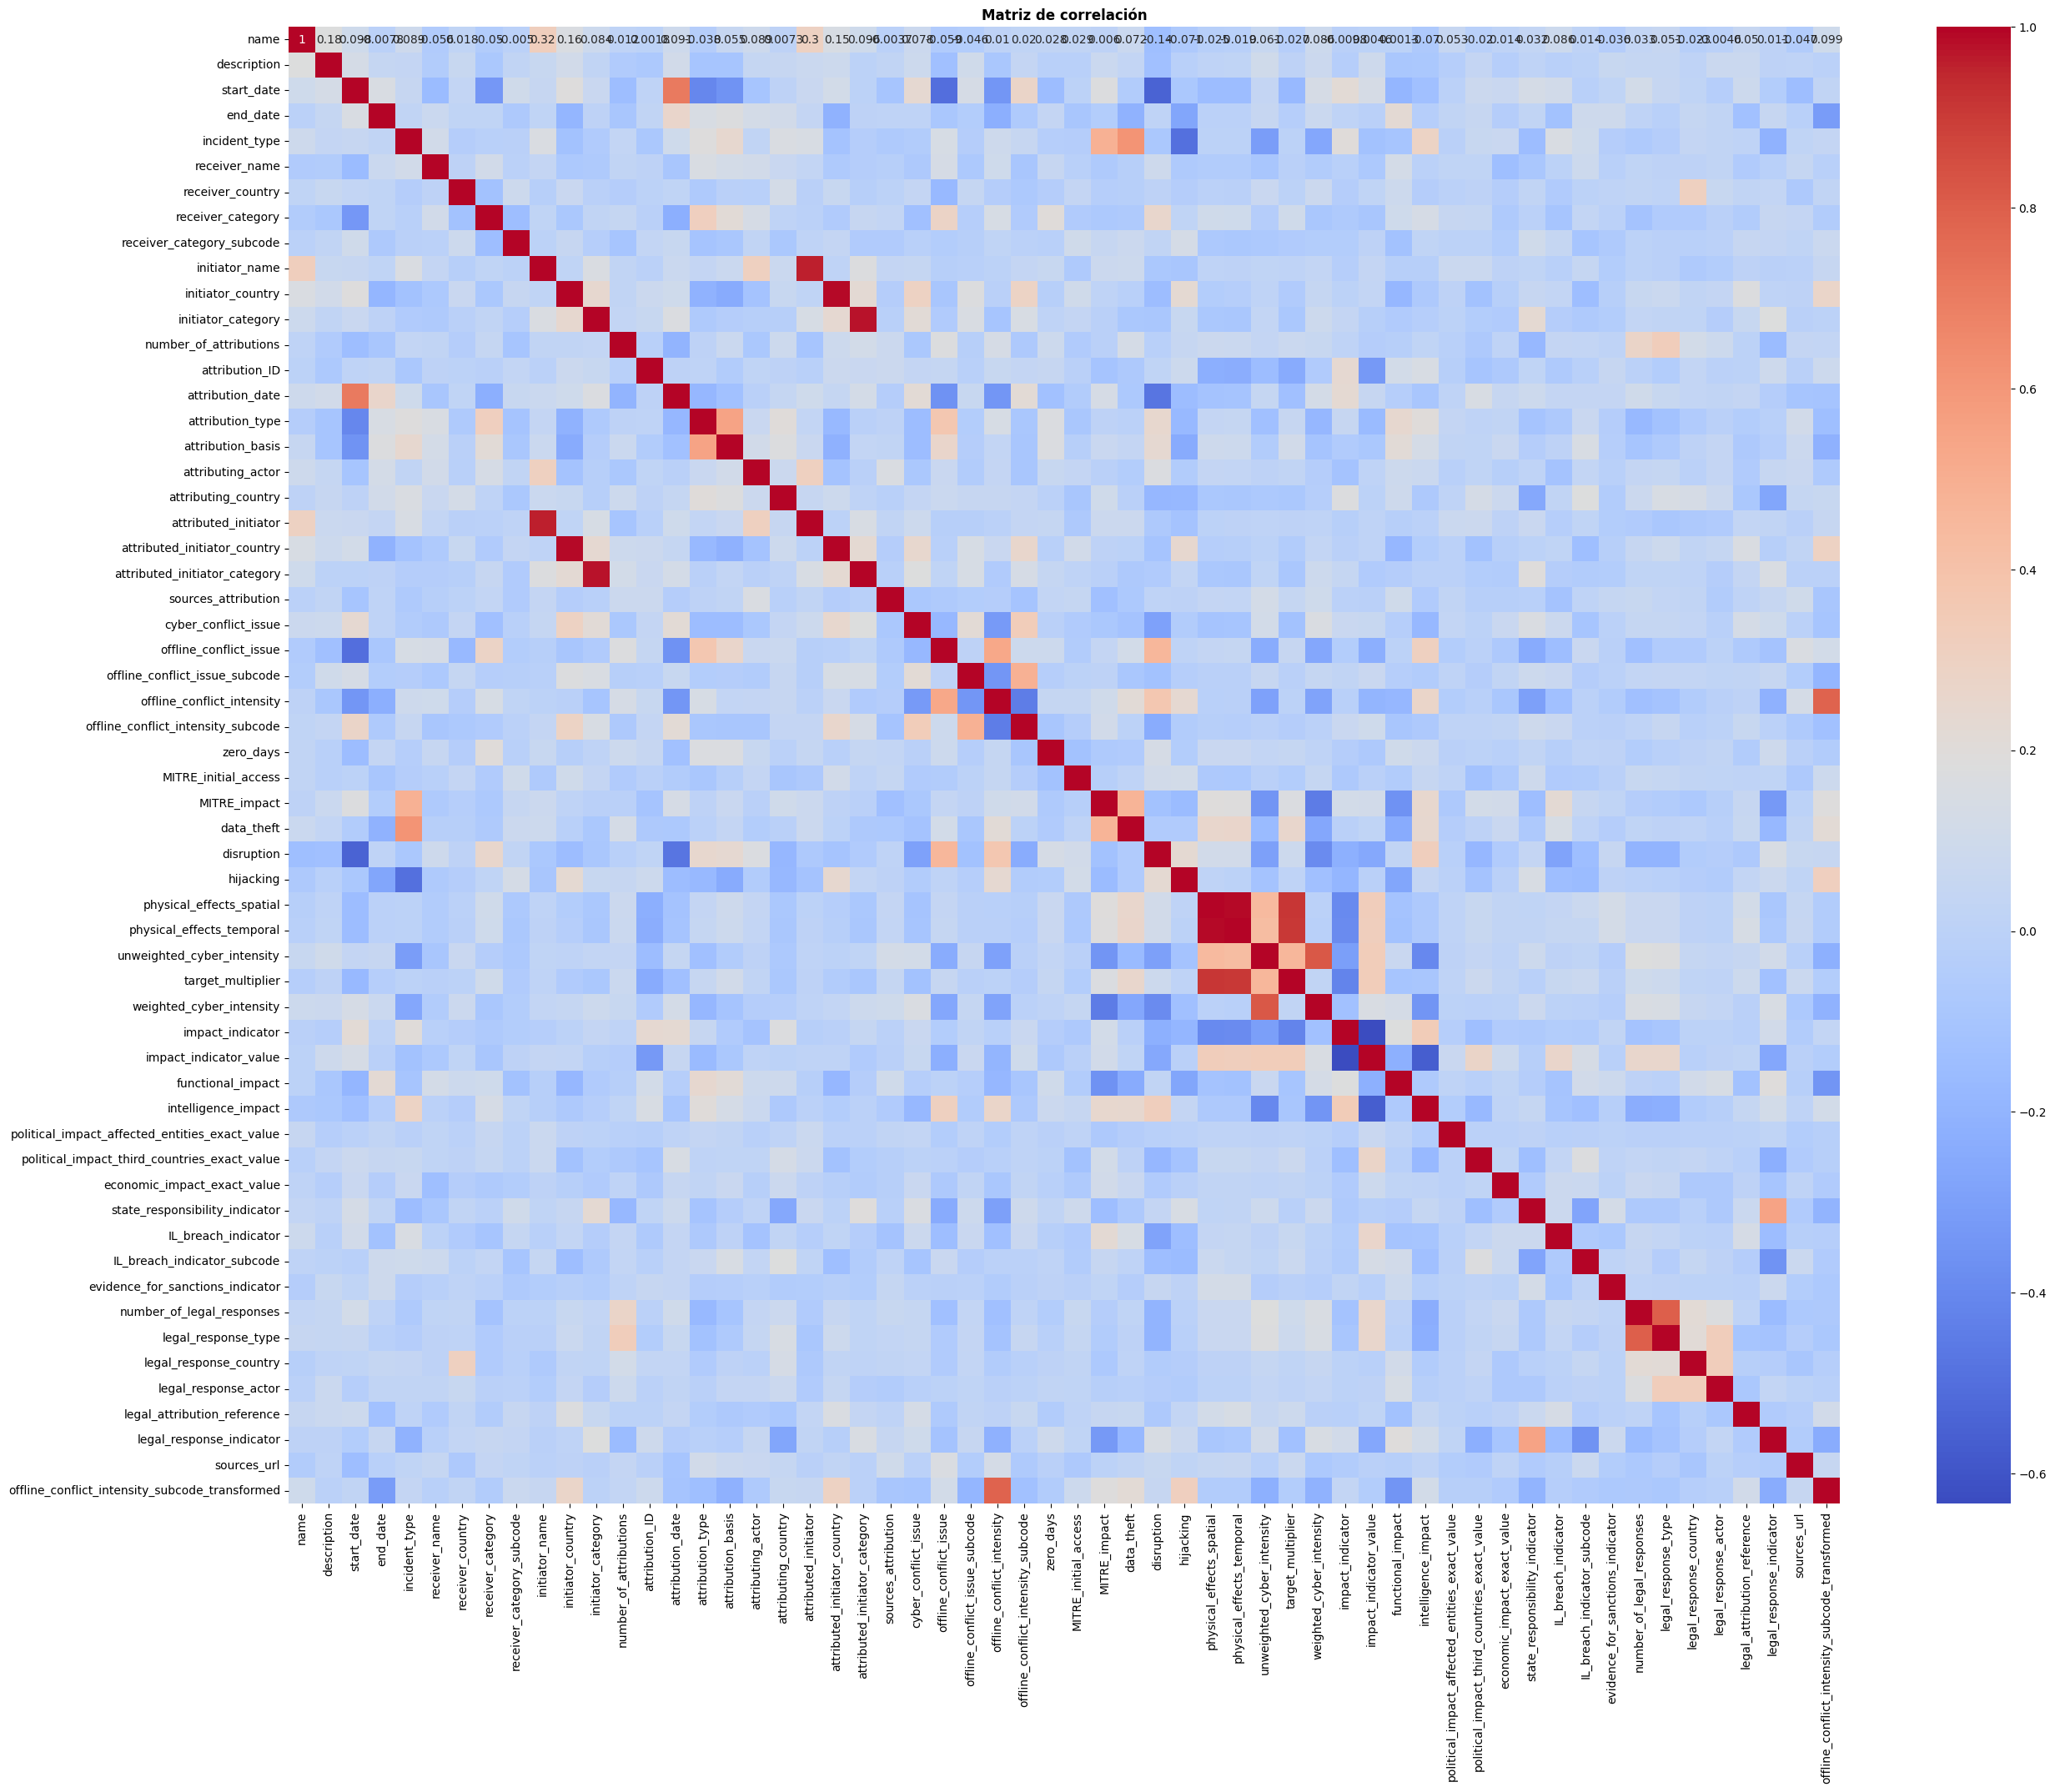

In [74]:

df = df.select_dtypes(include=[np.number])
corr = df.corr()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 23))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Matriz de correlación", fontweight='bold')

In [75]:
# Quitamos todas las columnas que tengan una relación menor a 0,10 con incident type
df = df.drop(columns=corr['incident_type'][abs(corr['incident_type']) <= 0.09].index)

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 2. Dividir los datos en características (X) y etiquetas (y)
X = df.drop(columns=['incident_type'])  # Reemplaza 'target' por el nombre de tu columna objetivo
y = df['incident_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=38)

# 4. Entrenar un modelo (Random Forest en este caso)
model = RandomForestClassifier(random_state=38)
model.fit(X_train, y_train)

# 5. Hacer predicciones
y_pred = model.predict(X_test)

# 6. Calcular la accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8395


In [77]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar un modelo (ejemplo con árbol de decisión)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.75
